# Extending the Linear Model

In [1]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines

from scipy.optimize import minimize

In [2]:
df_reviews = pd.read_csv('https://tinyurl.com/moviereviewsdata')

## Interactions

In [3]:
model_base = smf.ols(
    formula = 'rating ~ children_in_home + genre', 
    data = df_reviews
).fit()

model_interaction = smf.ols(
    formula = 'rating ~ children_in_home * genre', 
    data = df_reviews
).fit()

model_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     21.16
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           3.44e-50
Time:                        20:53:36   Log-Likelihood:                -814.77
No. Observations:                1000   AIC:                             1662.
Df Residuals:                     984   BIC:                             1740.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             2.7641      0.039     70.058      0.000       2.687       2.842
genre[T.Comedy]                       0.6371      0.076      8.376      0.000       0.488       0.786
genre[T.Drama]                        0.5352      0.054      9.968      0.000       0.430       0.641
genre[T.Horror]                       0.1938      0.101      1.919      0.055      -0.004       0.392
genre[T.Kids]                        -0.2759      0.079     -3.478      0.001      -0.432      -0.120
genre[T.Other]                        0.0836      0.097      0.862      0.389      -0.107       0.274
genre[T.Romance]                      0.2981      0.087      3.436      0.001       0.128       0.468
genre[T.Sci-Fi]                      -0.1090      0.100     -1.090      0.276      -0.305       0.087
children_in_home                      0.1419      0.053      2.695      0.007       0.039       0.245
children_in_home:genre[T.Comedy]     -0.0060      0.104     -0.058      0.954      -0.211       0.199
children_in_home:genre[T.Drama]       0.0534      0.073      0.731      0.465      -0.090       0.197
children_in_home:genre[T.Horror]     -0.1274      0.110     -1.154      0.249      -0.344       0.089
children_in_home:genre[T.Kids]        0.2306      0.108      2.132      0.033       0.018       0.443
children_in_home:genre[T.Other]      -0.1061      0.118     -0.903      0.367      -0.337       0.125
children_in_home:genre[T.Romance]    -0.1235      0.095     -1.303      0.193      -0.310       0.063
children_in_home:genre[T.Sci-Fi]     -0.0285      0.118     -0.241      0.810      -0.261       0.204
==============================================================================
Omnibus:                        3.039   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.219   Jarque-Bera (JB):                2.642
Skew:                          -0.032   Prob(JB):                        0.267
Kurtosis:                       2.757   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
sm.stats.anova_lm(model_interaction)

,df,sum_sq,mean_sq,F,PR(>F)
genre,7.0,83.833560,11.976223,39.453868,5.166472e-49
children_in_home,1.0,8.784237,8.784237,28.938349,9.338273e-08
children_in_home:genre,7.0,3.747015,0.535288,1.763426,9.116589e-02
Residual,984.0,298.693228,0.303550,NaN,NaN


## Mixed Models

In [5]:
df_happiness_all = pd.read_csv("https://tinyurl.com/worldhappinessallyears")

df_happiness_all = (
    df_happiness_all
    .assign(decade_0 = lambda x: (x['year']- x['year'].min())/10)
)

model_ran_int = sm.MixedLM.from_formula(
    "happiness_score ~ decade_0", 
    df_happiness_all, 
    re_formula='1',
    groups=df_happiness_all["country"]  
).fit()

model_ran_slope = sm.MixedLM.from_formula(
    "happiness_score ~ decade_0", 
    df_happiness_all, 
    re_formula='1 + decade_0',
    groups=df_happiness_all["country"]  
).fit()

In [6]:
model_ran_int.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:            MixedLM Dependent Variable: happiness_score
No. Observations: 2199    Method:             REML           
No. Groups:       164     Scale:              0.1830         
Min. group size:  1       Log-Likelihood:     -1609.2305     
Max. group size:  17      Converged:          Yes            
Mean group size:  13.4                                       
---------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|   [0.025   0.975]
---------------------------------------------------------------
Intercept   5.321      0.085   62.717   0.000    5.155    5.487
decade_0    0.092      0.020    4.681   0.000    0.054    0.131
Group Var   1.108      0.303                                   
=============================================================

"""

In [7]:
model_ran_slope.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:              MixedLM Dependent Variable: happiness_score
No. Observations:   2199    Method:             REML           
No. Groups:         164     Scale:              0.1176         
Min. group size:    1       Log-Likelihood:     -1325.6418     
Max. group size:    17      Converged:          Yes            
Mean group size:    13.4                                       
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             5.339    0.092 58.050 0.000  5.159  5.519
decade_0              0.060    0.050  1.203 0.229 -0.038  0.157
Group Var             1.315    0.462                           
Group x decade_0 Cov -0.247    0.182                           
decade_0 Var          0.326    0.139                           
===============================================================

"""

In [8]:
estimated_RE = pd.DataFrame(model_ran_slope.random_effects)

In [9]:
ranef_usa = estimated_RE['United States'].rename({'Group': 'Intercept'})
ranef_usa + model_ran_slope.fe_params

Intercept    7.296458
decade_0    -0.275330
dtype: float64

## Generalized Additive Models

In [10]:

import plotly.graph_objects as go
import numpy as np

x = np.random.normal(size = 1000)
x.sort()
y = np.sin(x)

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x = x, 
        y = y,
        line_shape = 'spline'
    )
)

### A Standard GAM

In [11]:
df_happiness_2018 = pd.read_csv('https://tinyurl.com/worldhappiness2018')

bs = BSplines(
    df_happiness_2018['healthy_life_expectancy_at_birth'],
    df = 9,
    degree = 3
)

gam_happiness = GLMGam.from_formula(
    'happiness_score ~ healthy_life_expectancy_at_birth', 
    smoother = bs,
    data = df_happiness_2018
)

model_gam = gam_happiness.fit()

model_gam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        happiness_score   No. Observations:                  112
Model:                         GLMGam   Df Residuals:                   103.00
Model Family:                Gaussian   Df Model:                         8.00
Link Function:               Identity   Scale:                         0.38282
Method:                         PIRLS   Log-Likelihood:                -100.46
Date:                Sun, 20 Oct 2024   Deviance:                       39.430
Time:                        20:53:38   Pearson chi2:                     39.4
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9093
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.6407      0.967      0.662      0.508      -1.255       2.536
healthy_life_expectancy_at_birth        0.0801      0.010      8.416      0.000       0.061       0.099
healthy_life_expectancy_at_birth_s0     0.3574      0.948      0.377      0.706      -1.501       2.216
healthy_life_expectancy_at_birth_s1    -2.0864      0.605     -3.448      0.001      -3.272      -0.900
healthy_life_expectancy_at_birth_s2    -0.4160      0.637     -0.653      0.514      -1.665       0.833
healthy_life_expectancy_at_birth_s3    -0.5786      0.420     -1.378      0.168      -1.402       0.245
healthy_life_expectancy_at_birth_s4    -0.2643      0.486     -0.543      0.587      -1.218       0.689
healthy_life_expectancy_at_birth_s5     0.5566      0.594      0.936      0.349      -0.608       1.722
healthy_life_expectancy_at_birth_s6     0.5079      0.555      0.915      0.360      -0.580       1.596
healthy_life_expectancy_at_birth_s7    -0.7452      0.575     -1.296      0.195      -1.872       0.381
=======================================================================================================
"""

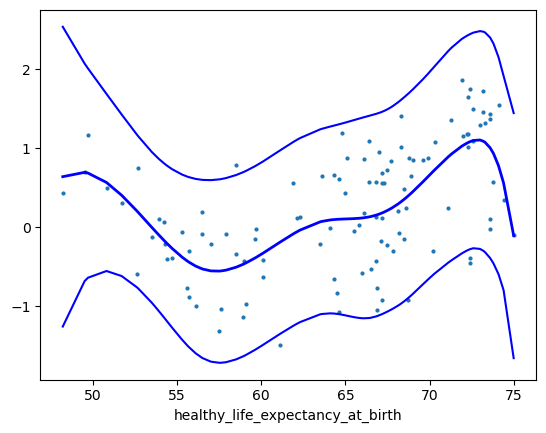

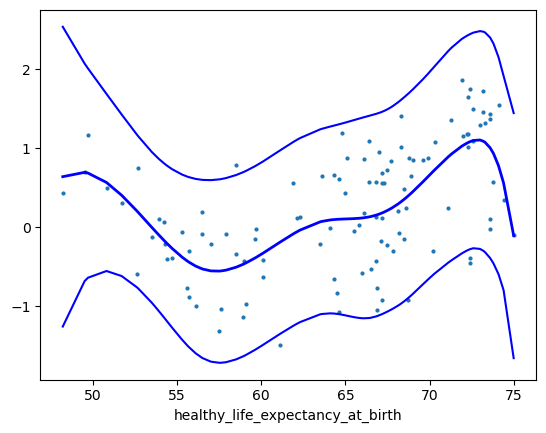

In [12]:
# not shown
model_gam.plot_partial(0, cpr=True)

## Quantile Regression

In [13]:
model_median = smf.quantreg('rating ~ word_count_sc',  data = df_reviews)
model_median = model_median.fit(q = .5)

model_median.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                 rating   Pseudo R-squared:               0.1247
Model:                       QuantReg   Bandwidth:                      0.2375
Method:                 Least Squares   Sparsity:                        1.221
Date:                Sun, 20 Oct 2024   No. Observations:                 1000
Time:                        20:53:38   Df Residuals:                      998
                                        Df Model:                            1
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.0886      0.019    160.023      0.000       3.051       3.126
word_count_sc    -0.2852      0.019    -14.770      0.000      -0.323      -0.247
=================================================================================
"""

In [14]:
model_median = smf.quantreg('rating ~ word_count_sc',  data = df_reviews)

output_dict = {}

for q in [0.25, 0.5, 0.75]:
    model_median = smf.quantreg('rating ~ word_count_sc', data=df_reviews)
    model_median = model_median.fit(q=q)
    output_dict[f"model_q{q}"] = model_median

output_dict

{'model_q0.25': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1686e8230>,
 'model_q0.5': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1687028d0>,
 'model_q0.75': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x168703ad0>}

### Rolling Our Own

In [15]:
def quantile_loss(par, X, y, tau):
    y_hat = X.dot(par)
    
    residual = y - y_hat
    
    loss = np.where(
        residual < 0, 
        (tau - 1) * residual, 
        tau * residual
    )
    
    return sum(loss)

In [16]:
X = pd.DataFrame(
    {'intercept': 1, 
    'word_count_sc': df_reviews['word_count_sc']}
)
y = df_reviews['rating']

minimize(quantile_loss, x0 = np.array([0, 0]), args = (X, y, .5)).x

array([ 3.09011343, -0.28416408])